In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [7]:
train_dir = "dataset/train/"
val_dir = "dataset/validation/"

# Augmentasi Data
train_datagen = ImageDataGenerator(
    rescale=1.0/255,              # Normalisasi nilai pixel ke [0,1]
    rotation_range=20,            # Rotasi hingga 20 derajat
    width_shift_range=0.2,        # Pergeseran horizontal
    height_shift_range=0.2,       # Pergeseran vertikal
    shear_range=0.2,              # Distorsi gambar
    zoom_range=0.2,               # Zoom in dan out
    horizontal_flip=True          # Flip horizontal
)

val_datagen = ImageDataGenerator(rescale=1.0/255)

# Load Data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),       # Ubah ukuran gambar menjadi 128x128
    batch_size=32,
    class_mode='sparse'           # Label dalam bentuk angka
)

val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='sparse'
)


Found 1278 images belonging to 5 classes.
Found 174 images belonging to 5 classes.


In [8]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')  # 4 kelas: pensil, penghapus, pulpen, penggaris
])


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
history = model.fit(
    train_data,
    epochs=10,
    validation_data=val_data
)

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 17s 381ms/step - accuracy: 0.2243 - loss: 1.8991 - val_accuracy: 0.3276 - val_loss: 1.5777
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 14s 357ms/step - accuracy: 0.2908 - loss: 1.5577 - val_accuracy: 0.3793 - val_loss: 1.4629
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 15s 372ms/step - accuracy: 0.3905 - loss: 1.4696 - val_accuracy: 0.4540 - val_loss: 1.3079
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 15s 362ms/step - accuracy: 0.4293 - loss: 1.3809 - val_accuracy: 0.5115 - val_loss: 1.2417
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 15s 370ms/step - accuracy: 0.4547 - loss: 1.3391 - val_accuracy: 0.6092 - val_loss: 1.0965
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 15s 361ms/step - accuracy: 0.4889 - loss: 1.2978 - val_accuracy: 0.5690 - val_loss: 1.1254
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 15s 366ms/step - accuracy: 0.5189 - loss: 1.2201 - val_accuracy: 0.5920 - val_loss: 1.1392
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 15s 363ms/step - accuracy: 0.5397 - loss: 1.1495 - val_accu

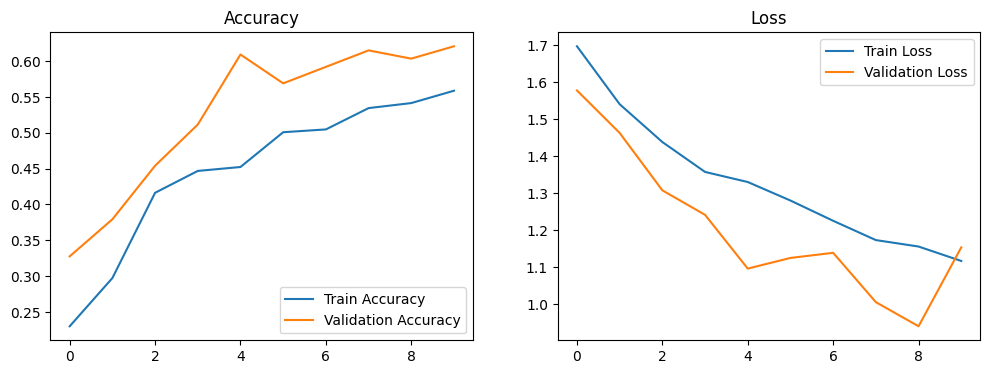

In [11]:
# Plot Akurasi dan Loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Predicted Class: pulpen


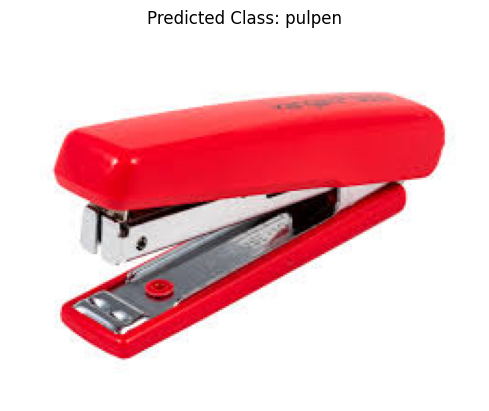

In [19]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Uji dengan gambar baru
img_path = "dataset/test9.jpg"
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img) / 255.0  # Normalisasi
img_array = np.expand_dims(img_array, axis=0)

# Prediksi
predictions = model.predict(img_array)
class_names = list(train_data.class_indices.keys())  # Nama kelas
predicted_class = class_names[np.argmax(predictions)]
print(f"Predicted Class: {predicted_class}")

plt.imshow(image.load_img(img_path))  # Tampilkan gambar asli
plt.axis('off')  # Hilangkan axis
plt.title(f"Predicted Class: {predicted_class}")  # Tampilkan prediksi di judul
plt.show()